In [4]:
from paddleocr import PaddleOCR

# Cargar modelo PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='es',show_log=False,rec_char_type='digit')


0: 640x640 1 License_Plate, 83.6ms
Speed: 2.2ms preprocess, 83.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


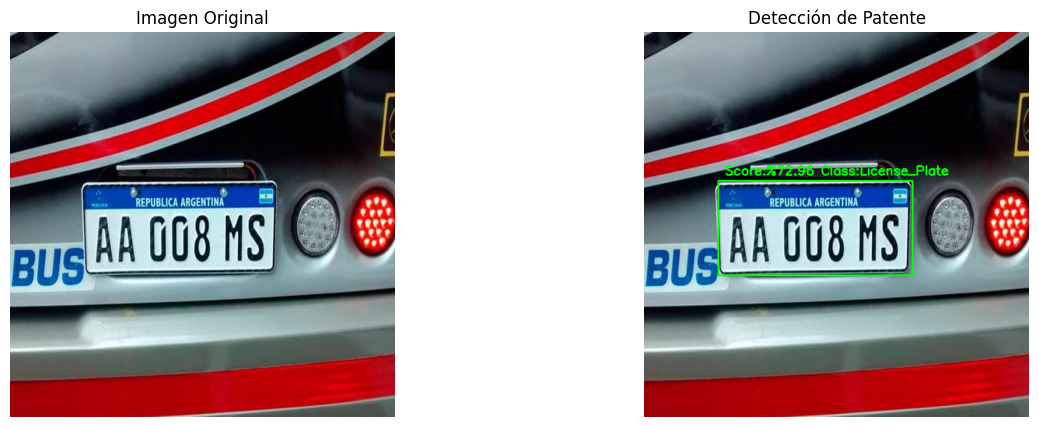


0: 640x640 1 License_Plate, 216.8ms
Speed: 7.9ms preprocess, 216.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


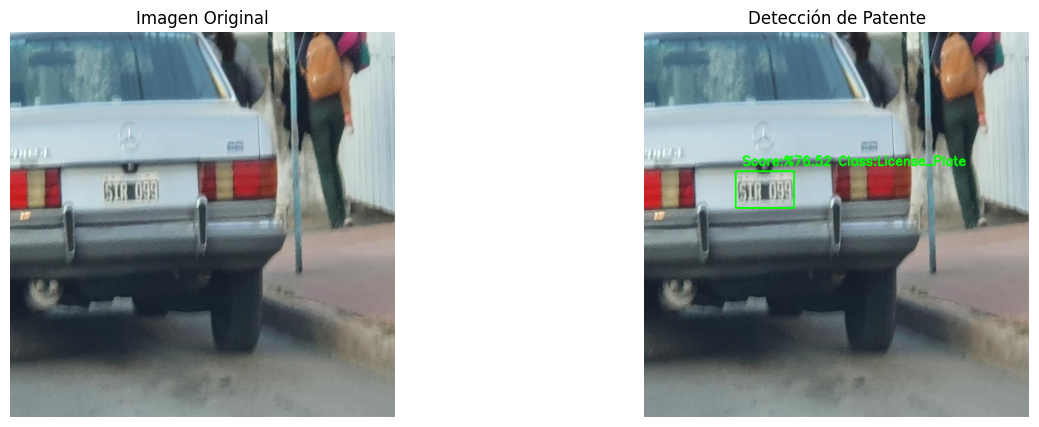


0: 640x640 2 License_Plates, 222.5ms
Speed: 0.0ms preprocess, 222.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
No encontró el texto


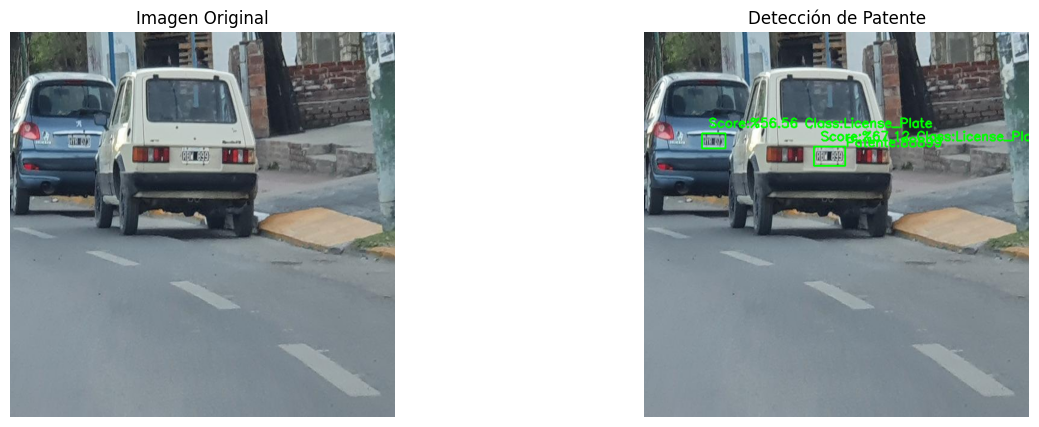


0: 640x640 1 License_Plate, 231.6ms
Speed: 0.5ms preprocess, 231.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


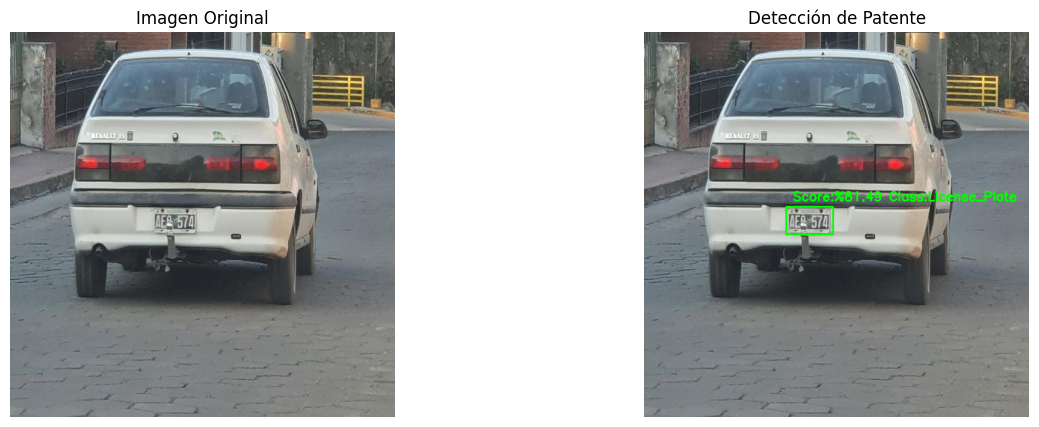


0: 640x640 1 License_Plate, 216.2ms
Speed: 10.0ms preprocess, 216.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
No encontró el texto


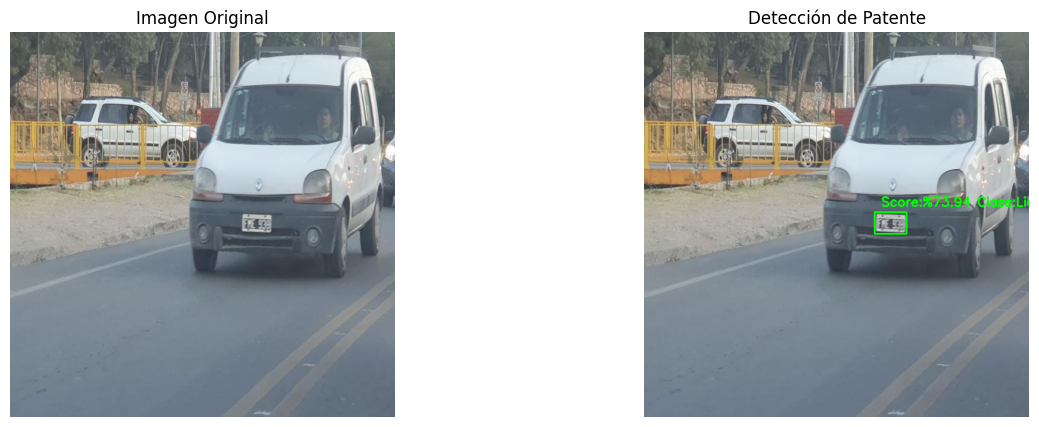


0: 640x640 2 License_Plates, 214.4ms
Speed: 14.0ms preprocess, 214.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


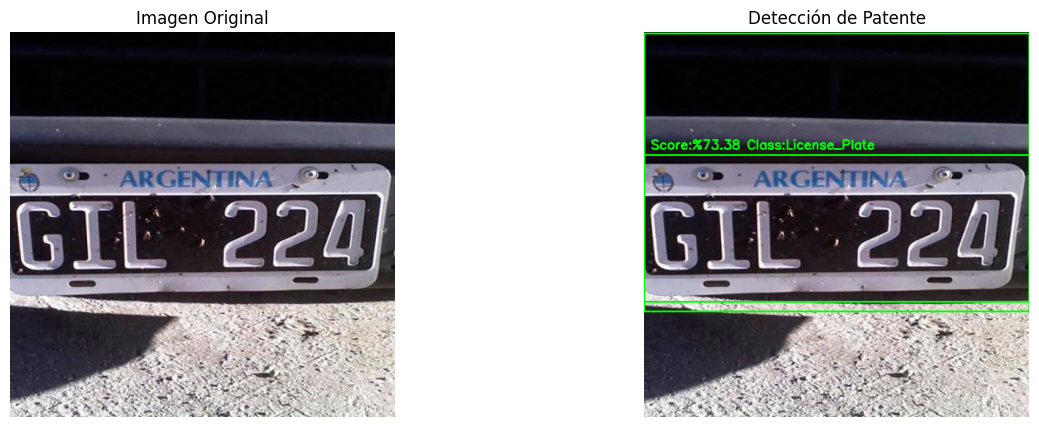


0: 640x640 1 License_Plate, 241.4ms
Speed: 8.8ms preprocess, 241.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


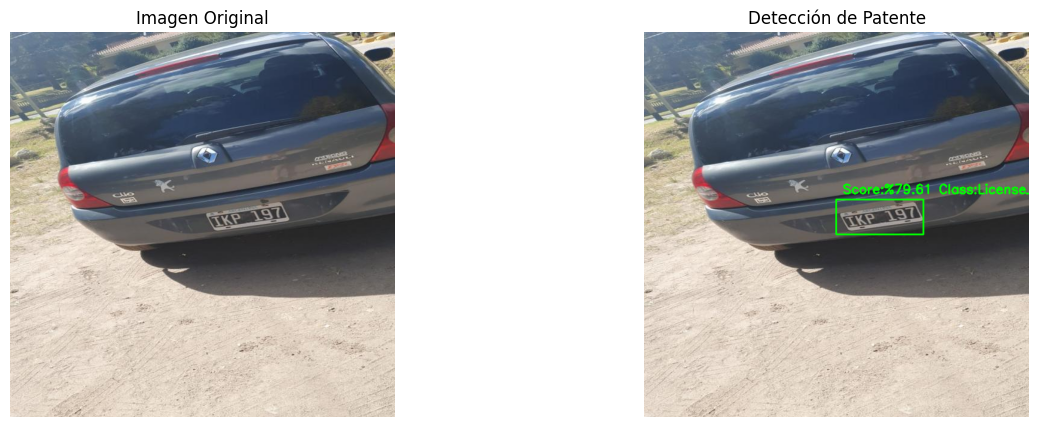


0: 640x640 1 License_Plate, 227.0ms
Speed: 3.3ms preprocess, 227.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


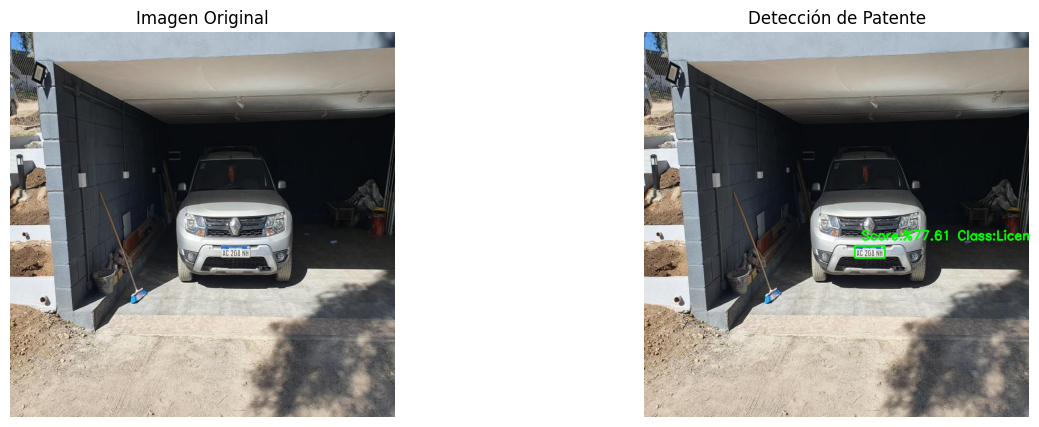


0: 640x640 1 License_Plate, 230.0ms
Speed: 3.1ms preprocess, 230.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
No encontró el texto


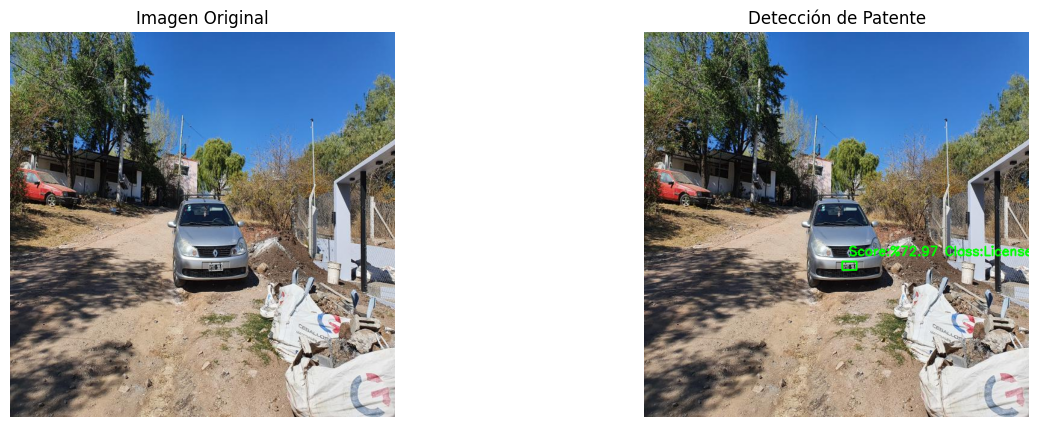


0: 640x640 1 License_Plate, 250.6ms
Speed: 0.0ms preprocess, 250.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
No encontró el texto


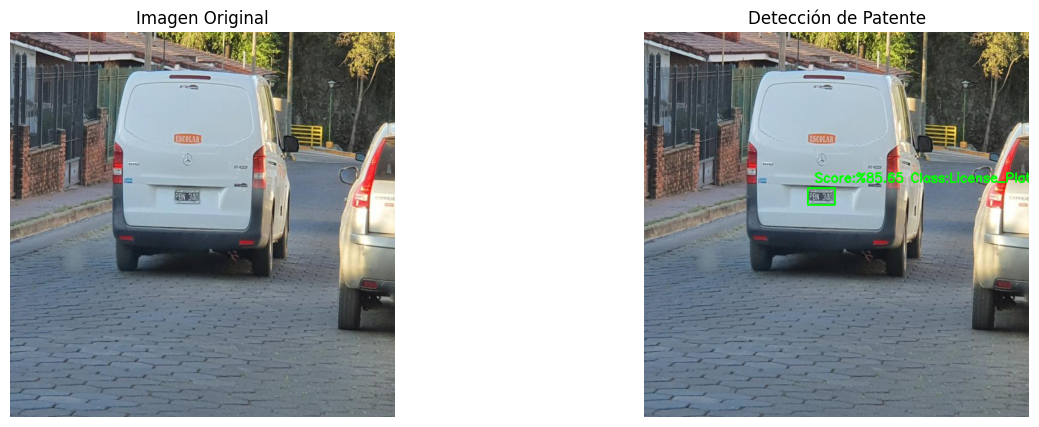


0: 640x640 1 License_Plate, 239.5ms
Speed: 0.0ms preprocess, 239.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


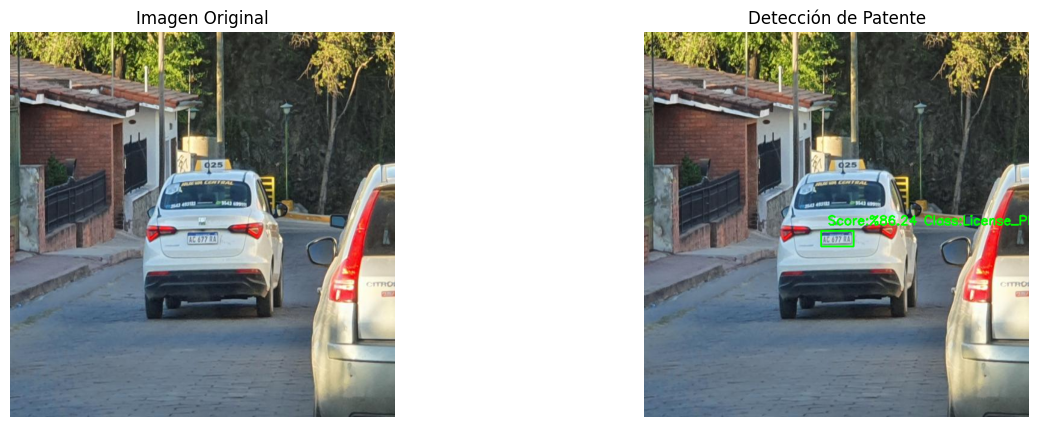


0: 640x640 2 License_Plates, 229.1ms
Speed: 0.0ms preprocess, 229.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
No encontró el texto


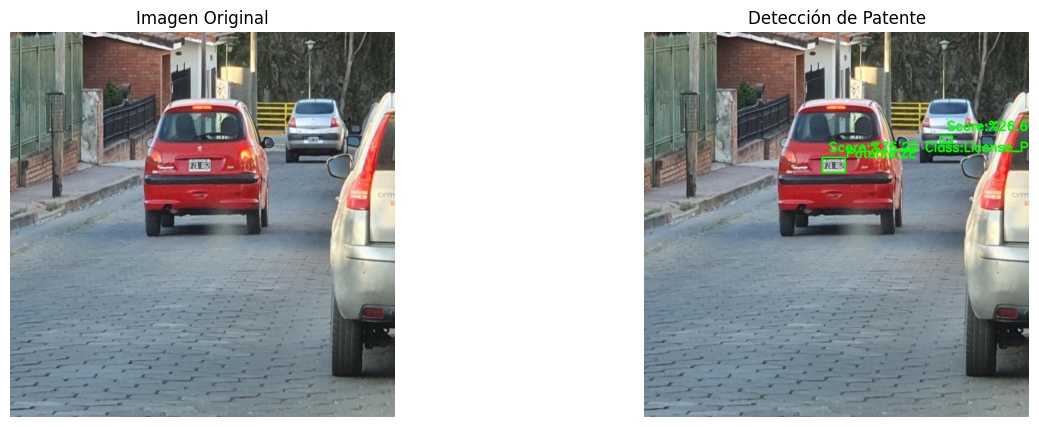


0: 640x640 1 License_Plate, 243.8ms
Speed: 11.0ms preprocess, 243.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


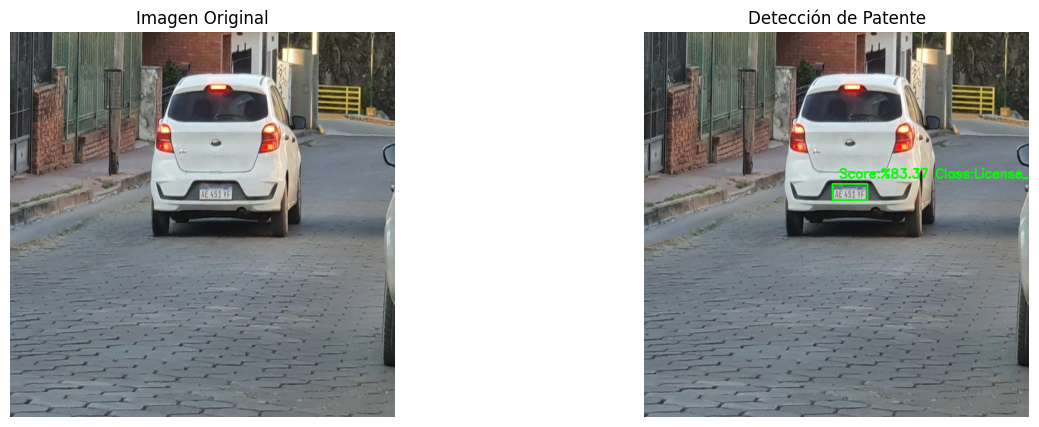


0: 640x640 1 License_Plate, 217.5ms
Speed: 2.0ms preprocess, 217.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


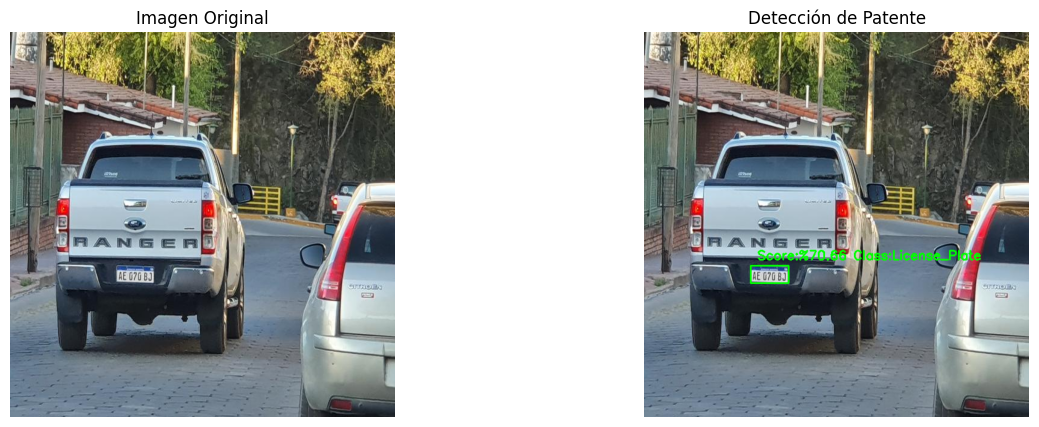


0: 384x640 1 License_Plate, 148.1ms
Speed: 0.0ms preprocess, 148.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


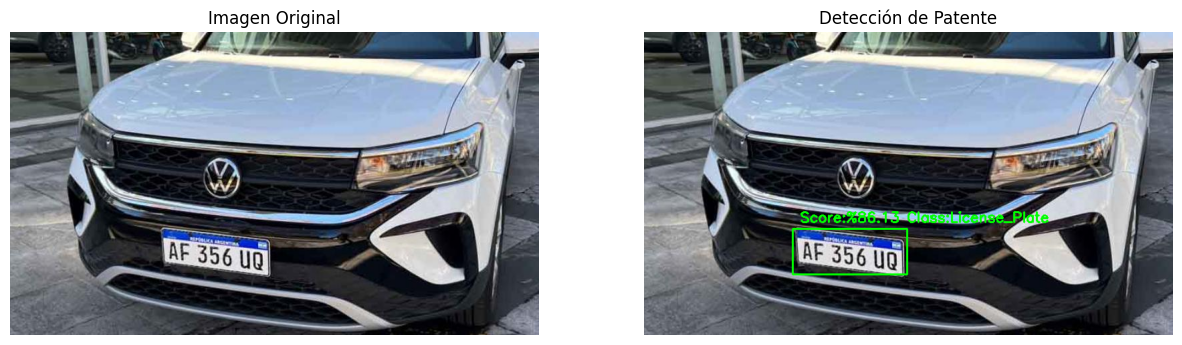


0: 416x640 1 License_Plate, 167.6ms
Speed: 0.0ms preprocess, 167.6ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 640)


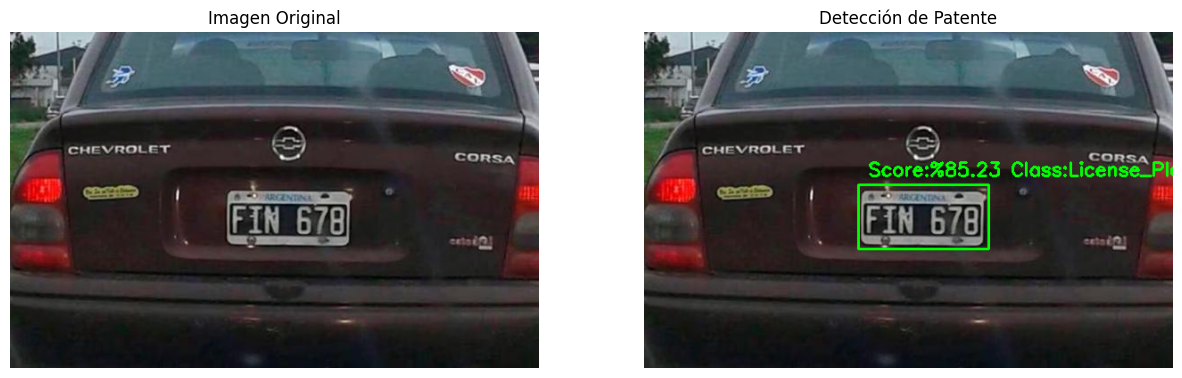


0: 416x640 1 License_Plate, 141.2ms
Speed: 2.6ms preprocess, 141.2ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 640)


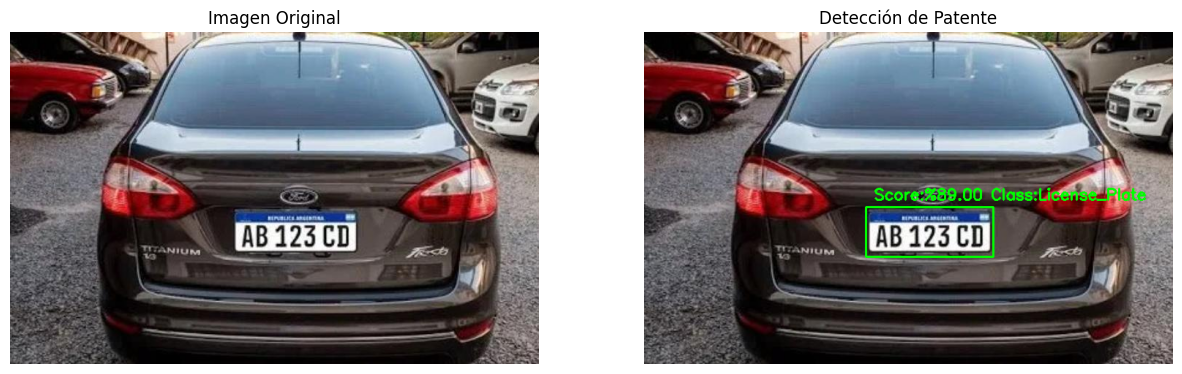

In [3]:
%matplotlib inline
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import glob


images=[]
for img in glob.glob("./images/*.jpg"):
    image=cv2.imread(img)
    images.append(image)
    
# Cargar el modelo guardado
model = YOLO("./runs/detect/train2/weights/best.pt")

plate_areas=[]

for image in images:

    original_image = image
    
    # Crear una copia para las detecciones
    image_with_boxes = original_image.copy()
    
    # Realizar la detección
    results = model(image_with_boxes)

    # Procesar cada detección para dibujar recuadros y mostrar la confianza
    for result in results[0].boxes:
        x1, y1, x2, y2 = map(int, result.xyxy[0])  # Coordenadas del recuadro de detección
        clase = int(result.cls[0])                 # Clase del objeto detectado
    
        confianza = result.conf[0].item()          # Nivel de confianza
        
        # Dibujar el recuadro (color verde y grosor de 2 píxeles)
        cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Escribir la confianza encima del recuadro
        label = f" Score:%{confianza*100:.2f} Class:{model.names.get(clase)}"
        cv2.putText(image_with_boxes, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    
        # Convertir BGR a RGB para que las imágenes se muestren correctamente en Matplotlib
        original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        image_with_boxes_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)
        
        plate_area = image_with_boxes[y1:y2, x1:x2]
        plate_areas.append(plate_area)


        result = ocr.ocr(plate_area, cls=True)
        if result[0]!=None:
            line=result[0]
            for word in line:
                text = word[1][0]
                label = f" Patente:{text}"
                cv2.putText(image_with_boxes, label, (x2-10, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        else:
            print("No encontró el texto")


    # Mostrar ambas imágenes en una figura con dos subplots
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.title("Imagen Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(image_with_boxes_rgb)
    plt.title("Detección de Patente")
    plt.axis("off")
        
    plt.show()

Patente: AA008MS, Confianza: % 89.00
Patente: AE-574, Confianza: % 89.00
Patente: GIL224, Confianza: % 89.00
Patente: GIL224, Confianza: % 89.00
Patente: IKP 197, Confianza: % 89.00
Patente: AC208NH, Confianza: % 89.00
Patente: AC677RA, Confianza: % 89.00
Patente: AE4STYE, Confianza: % 89.00
Patente: AE070BJ, Confianza: % 89.00
Patente: AF356UQ, Confianza: % 89.00
Patente: FIN 678, Confianza: % 89.00
Patente: AB123CD, Confianza: % 89.00


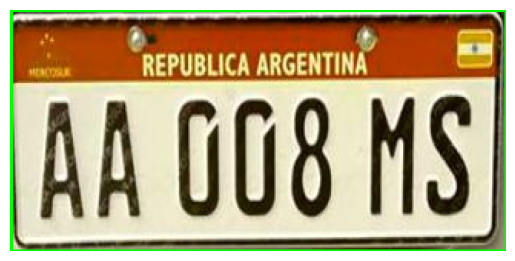

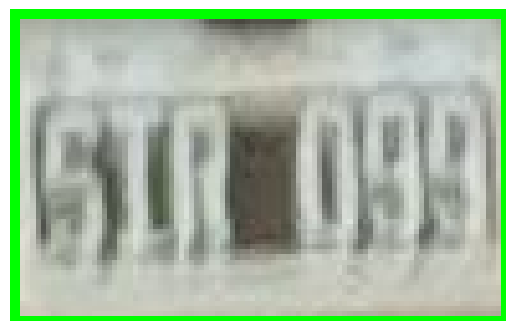

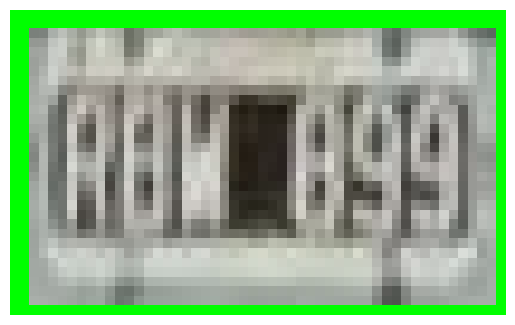

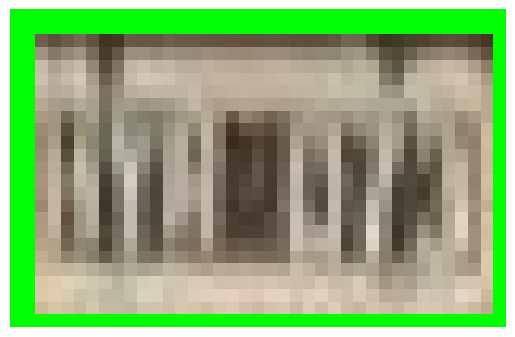

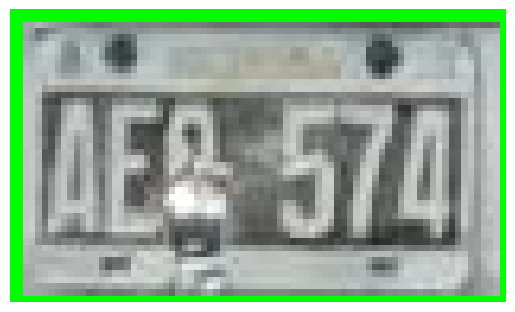

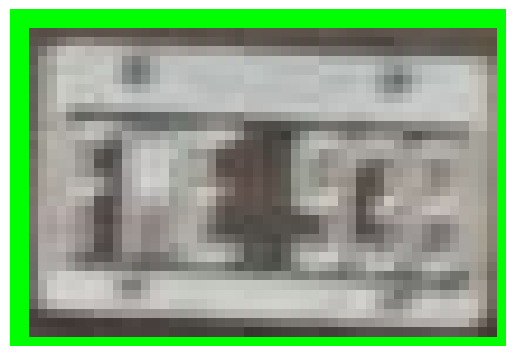

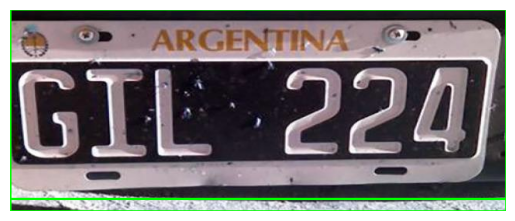

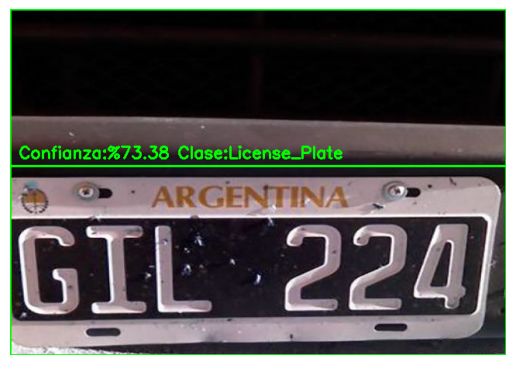

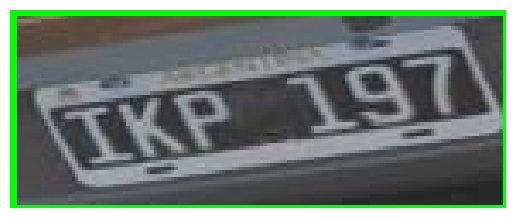

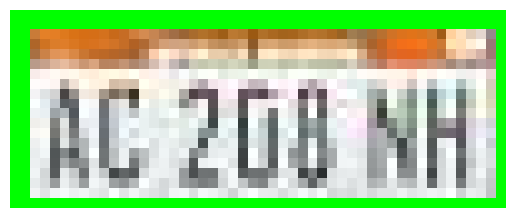

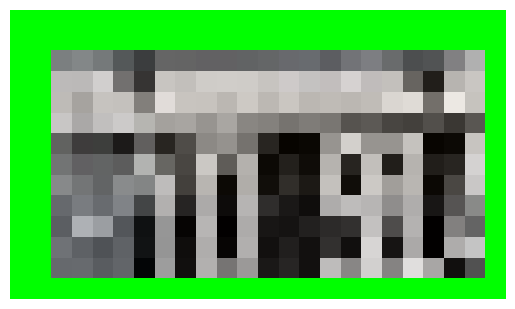

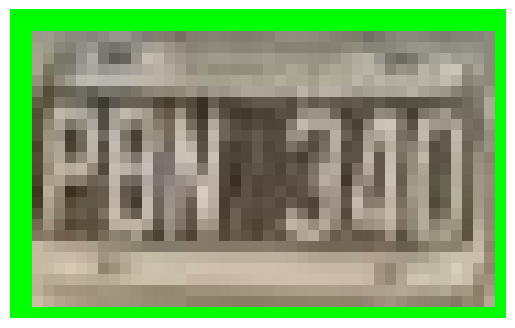

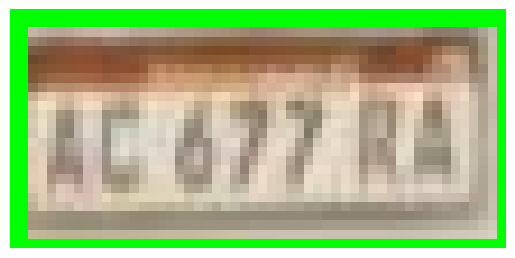

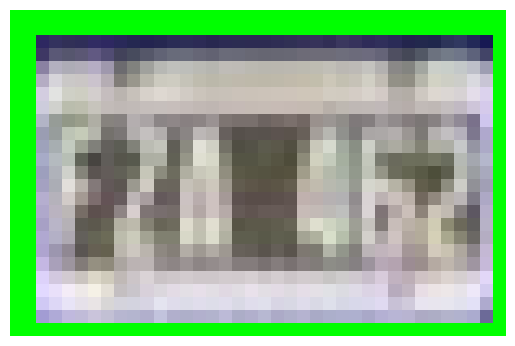

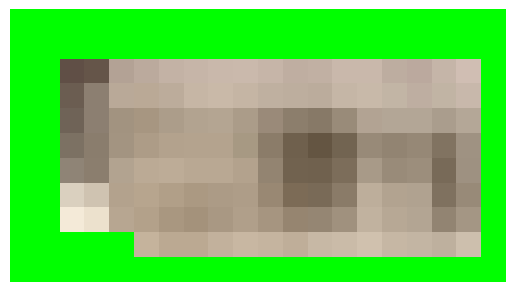

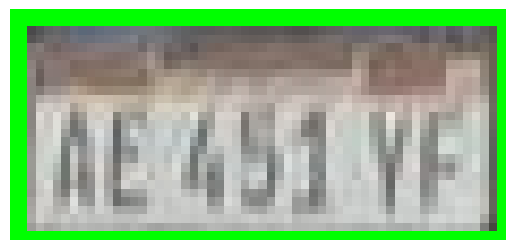

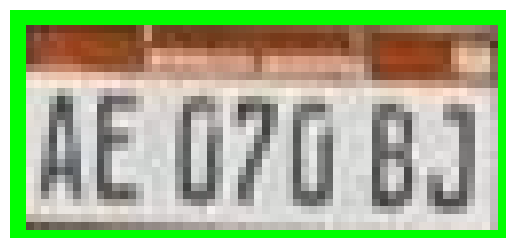

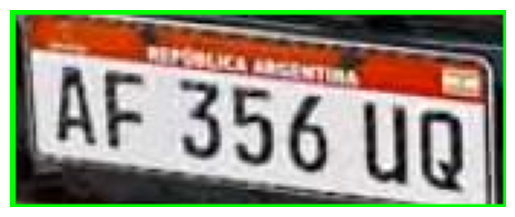

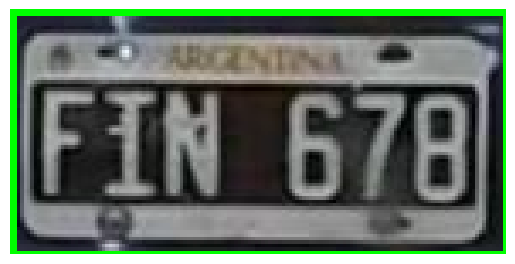

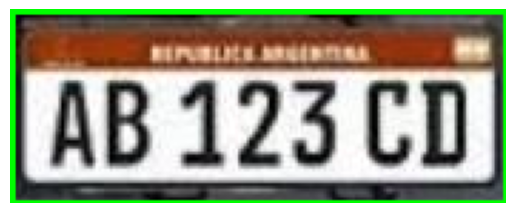

In [31]:
from PIL import Image


for plate_area in plate_areas:
    plt.figure()       
    plt.imshow(plate_area) 
    plt.axis('off')
    
    #plate_area_gray = cv2.cvtColor(plate_area, cv2.COLOR_BGR2GRAY)
    
    # Realizar OCR
    result = ocr.ocr(plate_area, cls=True)
    if result[0]!=None:
        line=result[0]
        for word in line:
            if(len(word[1][0])>=6 and len(word[1][0])<=7 ):
                text, confidence = word[1][0], word[1][1]
                print(f'Patente: {text}, Confianza: %{confianza*100: .2f}')
        
plt.show()

In [2]:
from ultralytics import YOLO

model = YOLO('./runs/detect/train2/weights/best.pt')
model.export(format = 'onnx') # exports the model in '.onnx' format

Ultralytics 8.3.25  Python-3.11.0 torch-2.2.2+cpu CPU (AMD Ryzen 5 5625U with Radeon Graphics)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs\detect\train2\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ---------------------------------------- 14.5/14.5 MB 35.1 MB/s eta 0:00:00
   ---------------------------------------- 11.3/11.3 MB 41.7 MB/s eta 0:00:00

requirements: AutoUpdate success  20.6s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime']
requirements:  Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 17...
ONNX: slimming with onnxslim 0.1.39...
ONNX: export success  23.8s, saved as 'runs\detect\train2\weights\best.onnx' (11.7 MB)

Export complete (24.3s)
Results saved to C

'runs\\detect\\train2\\weights\\best.onnx'

!python -m onnxruntime.quantization.preprocess --input ./runs/detect/train2/weights/best.onnx --output ./runs/detect/train2/weights/preprocessed.onnx

In [4]:
import onnx
from onnxruntime.quantization import quantize_dynamic, QuantType

# Ruta de entrada y salida del modelo
input_model_path = './runs/detect/train2/weights/preprocessed.onnx'
quantized_model_path = './runs/detect/train2/weights/quantized_model.onnx'

# Cuantizar el modelo
quantize_dynamic(
    model_input=input_model_path,               # Modelo original ONNX
    model_output=quantized_model_path,          # Modelo cuantizado ONNX
    weight_type=QuantType.QUInt8                # Tipo de cuantización (INT8)
)

In [18]:
import cv2
import numpy as np
import onnxruntime as ort

# Cargar el modelo cuantizado
session = ort.InferenceSession("./runs/detect/train2/weights/quantized_model.onnx")

# Cargar la imagen
input_image = cv2.imread("./images/test.jpg")

# Redimensionar la imagen según las dimensiones de entrada esperadas (ajústalo a las dimensiones correctas de tu modelo)
input_image_resized = cv2.resize(input_image, (640, 640))  # Asumiendo que el modelo espera 640x640

# Convertir la imagen a RGB
input_image_resized_rgb = cv2.cvtColor(input_image_resized, cv2.COLOR_BGR2RGB)

# Reordenar las dimensiones a (C, H, W) para que coincida con las expectativas del modelo
input_image_resized_rgb = np.transpose(input_image_resized_rgb, (2, 0, 1))  # Convertir de (H, W, C) a (C, H, W)

# Normalizar los valores de los píxeles a [0, 1]
input_image_resized_rgb = input_image_resized_rgb.astype(np.float32) / 255.0

# Agregar una dimensión extra para el batch (1, C, H, W)
input_image_resized_rgb = np.expand_dims(input_image_resized_rgb, axis=0)

# Obtener los nombres de las entradas y salidas del modelo
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# Realizar inferencia
result = session.run([output_name], {input_name: input_image_resized_rgb})[0]

# Asumiendo que result contiene las coordenadas de las cajas delimitadoras y las clases
# Las coordenadas pueden ser en formato [x_min, y_min, x_max, y_max]
# Aquí ajustamos el resultado para obtener las coordenadas de las patentes detectadas

# Establecemos un umbral de confianza
confidence_threshold = 0.5  # Ajusta este valor según lo que necesites

# Extraer las coordenadas de la caja y las probabilidades
for detection in result:
    print(detection)
    box = detection[:4]  # Las primeras 4 columnas son las coordenadas de la caja
    confidence = detection[4]  # La quinta columna es la confianza

    # Filtramos por la confianza
    if confidence > confidence_threshold:
        x_min, y_min, x_max, y_max = map(int, box)

        # Dibujar el rectángulo en la imagen original
        cv2.rectangle(input_image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)  # Verde, grosor 2

        # Opcional: Puedes agregar texto para mostrar la confianza o la clase
        label = f"Confidence: {confidence * 100:.2f}%"
        cv2.putText(input_image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Mostrar la imagen con el rectángulo dibujado
cv2.imshow("Imagen con rectángulo de patente", input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[     15.706      18.804       17.97 ...      561.09      559.35      572.32]
 [     12.333      13.019      11.647 ...      608.22      600.84      601.19]
 [     31.588      37.677      37.277 ...      182.16      161.12      150.48]
 [     24.728      25.928      22.898 ...      64.721      80.386      88.619]
 [ 1.3232e-05  6.8843e-06   4.977e-06 ...   3.773e-05  4.1455e-05  6.2466e-05]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()